In [1]:
## Import Liberaries
import pandas as pd
import sqlite3

In [2]:
# Import the dataset
netflix = pd.read_csv('C:\\Rohan\\SharpestMinds - Projects\\Project 3\\netflix_titles.csv')

In [3]:
# Obtain the first 5 rows of this dataset
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Obtain the last 5 rows of this dataset
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,01-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,01-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,02-Mar-19,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
# Obtain all the columns of this dataset
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
# Obtain the dimensions of this dataset
netflix.shape

(8807, 12)

In [7]:
# import sqlalchemy and create a sqlite engine
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

# export the dataframe as a table 'playstore' to the sqlite engine
netflix.to_sql("netflix", con =engine)

8807

In [8]:
## Test the code by select the complete table

sql='''

Select * from netflix
limit 5


''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,s2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,3,s4,TV Show,Jailbirds New Orleans,None,None,None,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,4,s5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
## Obtain the distinct show id's from the netflix table

sql='''

Select distinct(show_id) from netflix



''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()

,show_id
0,s1
1,s2
2,s3
3,s4
4,s5


In [10]:
## Obtain the movies & tv shows that were released after the year 2020. Obtain the first 10 movies/shows

sql='''

Select 
distinct(title) from netflix
where release_year >2020



''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(10)

,title
0,Blood & Water
1,Ganglands
2,Jailbirds New Orleans
3,Kota Factory
4,Midnight Mass
5,My Little Pony: A New Generation
6,The Great British Baking Show
7,The Starling
8,"Vendetta: Truth, Lies and The Mafia"
9,Bangkok Breaking


In [11]:
## Obtain all the movies that were released beyond the year 2020 & have the title of "Blood & Water" or have rleased before
# the year 2021 and have the title of "Kota Factory" and not released in India

sql='''

Select 
distinct(title) from netflix
where release_year > 2020 and title='Blood & Water' or release_year < 2021 and title='Kota Factory'and not country= 'India'



''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()

,title
0,Blood & Water


In [12]:
# Obtain all the distinct movies & tv shows in ascending order and alias the column as name

sql='''

Select 
distinct(title) as name from netflix
order by title 


''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()

,name
0,#Alive
1,#AnneFrank - Parallel Stories
2,#FriendButMarried
3,#FriendButMarried 2
4,#Roxy


In [13]:
## Test the code by select the complete table

sql='''

Select
min(release_year) as min_release_year,
max(release_year) as max_release_year,
count(distinct release_year) as count_of_release_year,
round(avg(release_year),2) as avg_of_all_release_years,
sum(release_year) as avg_of_all_release_years
from netflix
limit 1



''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()

,min_release_year,max_release_year,count_of_release_year,avg_of_all_release_years,avg_of_all_release_years
0,1925,2021,74,2014.18,17738885


In [14]:
# Obtain the countries ending with 'ia'
sql='''

Select distinct ' country that End with ia :- '|| country as Value from netflix
where country like"%ia"
union all
Select distinct 'country that Starts with ia :- '|| country as Value from netflix
where country like"ia%"
union all
Select distinct 'country that has ia :- '|| country as Value from netflix
where country like "%ia%"
union all
Select distinct 'country that starts and ends with a :- '|| country as Value from netflix
where country like "a%a%"





''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(10)

,Value
0,country that End with ia :- India
1,"country that End with ia :- United States, Gh..."
2,country that End with ia :- Australia
3,country that End with ia :- Nigeria
4,country that End with ia :- Russia
5,country that End with ia :- Colombia
6,"country that End with ia :- Switzerland, Unit..."
7,"country that End with ia :- United States, Ni..."
8,"country that End with ia :- , France, Algeria"
9,country that End with ia :- Saudi Arabia


In [15]:
# Obtain the data only for countries such as the US, India & Canada
sql='''

select * from netflix
where country in ('India','United States','Canada')
order by country asc





''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(10)

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,157,s158,Movie,Level 16,Danishka Esterhazy,"Katie Douglas, Celina Martin, Peter Outerbridg...",Canada,01-Sep-21,2018,TV-14,102 min,"Sci-Fi & Fantasy, Thrillers",In a bleak academy that teaches girls the virt...
1,510,s511,TV Show,Between,None,"Jennette McCurdy, Jesse Carere, Ryan Allen, Ju...",Canada,06-Jul-21,2016,TV-14,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",After a mysterious disease kills every residen...
2,521,s522,TV Show,Kim's Convenience,None,"Paul Sun-Hyung Lee, Jean Yoon, Andrea Bang, Si...",Canada,06-Jul-21,2021,TV-MA,5 Seasons,"International TV Shows, TV Comedies","While running a convenience store in Toronto, ..."
3,535,s536,TV Show,Some Assembly Required,None,"Kolton Stewart, Harrison Houde, Charlie Storwi...",Canada,06-Jul-21,2015,TV-Y,2 Seasons,"Kids' TV, TV Comedies",A 14-year-old takes ownership of a toy company...
4,544,s545,TV Show,Workin' Moms,None,"Catherine Reitman, Dani Kind, Juno Rinaldi, Je...",Canada,06-Jul-21,2021,TV-MA,5 Seasons,"International TV Shows, TV Comedies",Maternity leave is over and it's time for thes...
5,701,s702,Movie,Red Snow,Marie Clements,"Asivak Koostachin, Shafin Karim, Mozhdah Jamal...",Canada,17-Jun-21,2019,TV-MA,96 min,Dramas,"Ambushed by the Taliban, a First Nations soldi..."
6,954,s955,Movie,The Yeti Adventures,"Pierre Greco, Nancy Florence Savard","Rachelle Lefevre, Noel Fisher, Colm Feore, Jul...",Canada,01-May-21,2018,TV-PG,85 min,"Children & Family Movies, Comedies",An explorer and a detective set off for the sn...
7,1065,s1066,TV Show,Slasher,None,"Katie McGrath, Brandon Jay McLaren, Steve Byer...",Canada,14-Apr-21,2019,TV-MA,3 Seasons,"TV Horror, TV Mysteries, TV Thrillers",Rampaging serial killers leave carnage in thei...
8,1279,s1280,Movie,Made You Look: A True Story About Fake Art,Barry Avrich,None,Canada,23-Feb-21,2020,TV-14,90 min,"Documentaries, International Movies",A woman walks into a New York gallery with a c...
9,1354,s1355,TV Show,Heartland,None,"Amber Marshall, Michelle Morgan, Graham Wardle...",Canada,01-Feb-21,2019,TV-14,13 Seasons,TV Dramas,Spunky teenager Amy is reeling from the sudden...


In [16]:
# Obtain all the movies and tv shows that were released between the years 2020 & 2021
sql='''

select * from netflix
where release_year between 2020 and 2021





''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(10)

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,s2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,3,s4,TV Show,Jailbirds New Orleans,None,None,None,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,4,s5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",None,24-Sep-21,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",None,24-Sep-21,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,24-Sep-21,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
8,9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,24-Sep-21,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
9,10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",None,None,None,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."


In [17]:
# Perform an inner join
sql='''

select
n1.show_id as Show_idtable1,
n2.type as Show_idTable2,
n2.title as Showtable2
from netflix n1
join netflix n2 on n1.show_id = n2.show_id





''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(10)

,Show_idtable1,Show_idTable2,Showtable2
0,s1,Movie,Dick Johnson Is Dead
1,s2,TV Show,Blood & Water
2,s3,TV Show,Ganglands
3,s4,TV Show,Jailbirds New Orleans
4,s5,TV Show,Kota Factory
5,s6,TV Show,Midnight Mass
6,s7,Movie,My Little Pony: A New Generation
7,s8,Movie,Sankofa
8,s9,TV Show,The Great British Baking Show
9,s10,Movie,The Starling


In [18]:
# Merge both the Canada & India data
sql='''

select * from netflix where country='India'
union all
select * from netflix where country='Canada'





''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(10)

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,4,s5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
1,24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,21-Sep-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
2,39,s40,TV Show,Chhota Bheem,None,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,16-Sep-21,2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ..."
3,50,s51,TV Show,Dharmakshetra,None,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,15-Sep-21,2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup..."
4,66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,None,None,India,15-Sep-21,2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...
5,69,s70,TV Show,Stories by Rabindranath Tagore,None,None,India,15-Sep-21,2015,TV-PG,1 Season,"International TV Shows, TV Dramas",The writings of Nobel Prize winner Rabindranat...
6,105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,05-Sep-21,2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...
7,114,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,02-Sep-21,1994,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...
8,116,s117,Movie,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",India,02-Sep-21,2015,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...
9,118,s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,02-Sep-21,2017,TV-14,106 min,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...


In [19]:
# Obtain the total number of shows in India, the US & South Africa
sql='''

select
sum(case when country='India' then 1 else 0 end) as Shows_in_India,
sum(case when country='United States' then 1 else 0 end) as Shows_in_United_States,
sum(case when country='South Africa' then 1 else 0 end) as Shows_in_SA
from netflix





''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()

,Shows_in_India,Shows_in_United_States,Shows_in_SA
0,972,2818,30


In [20]:
sql='''

select distinct(a.title) from (select * from netflix) a





''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()

,title
0,Dick Johnson Is Dead
1,Blood & Water
2,Ganglands
3,Jailbirds New Orleans
4,Kota Factory


In [21]:
# Coalesce
## Helps us to handle null values, it replaces the null values with the data we feed after the comma

## syntax coalesce(col1name,submit value to replace the null value)

sql='''
select coalesce(release_year,0) as first_non_zero_value from netflix
limit 1




''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()

,first_non_zero_value
0,2020


The lead() and lag() functions in SQL are used to access data from a previous or subsequent row within a result set, based on a specified column ordering. These functions are commonly used in time-series analysis and can be very helpful in various other analytical applications.

Here's a brief explanation of how these functions work:

The lead() function returns the value of a column from the next row in the result set, based on a specified ordering. For example, if you want to see the sales for the next month alongside the current month's sales, you can use the lead() function to get the sales for the next month. The function takes two arguments: the first argument is the column to retrieve the value from, and the second argument is the number of rows to move forward (default is 1).
Example: SELECT sales, LEAD(sales) OVER (ORDER BY month) AS next_month_sales FROM sales_table;

The lag() function returns the value of a column from the previous row in the result set, based on a specified ordering. For example, if you want to calculate the percentage change in sales from one month to the next, you can use the lag() function to get the sales for the previous month. The function takes two arguments: the first argument is the column to retrieve the value from, and the second argument is the number of rows to move backward (default is 1).
Example: SELECT sales, LAG(sales) OVER (ORDER BY month) AS prev_month_sales, ((sales - LAG(sales) OVER (ORDER BY month)) / LAG(sales) OVER (ORDER BY month)) * 100 AS percent_change FROM sales_table;

In [22]:
# Convert the attribute "release_year" to float and alias the column as "first_non_zero_value"
sql='''
select cast(release_year as float) as first_non_zero_value from netflix





''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()

,first_non_zero_value
0,2020.0
1,2021.0
2,2021.0
3,2021.0
4,2021.0


The lead() and lag() functions in SQL are used to access data from a previous or subsequent row within a result set, based on a specified column ordering. These functions are commonly used in time-series analysis and can be very helpful in various other analytical applications.

Here's a brief explanation of how these functions work:

The lead() function returns the value of a column from the next row in the result set, based on a specified ordering. For example, if you want to see the sales for the next month alongside the current month's sales, you can use the lead() function to get the sales for the next month. The function takes two arguments: the first argument is the column to retrieve the value from, and the second argument is the number of rows to move forward (default is 1).
Example: SELECT sales, LEAD(sales) OVER (ORDER BY month) AS next_month_sales FROM sales_table;

The lag() function returns the value of a column from the previous row in the result set, based on a specified ordering. For example, if you want to calculate the percentage change in sales from one month to the next, you can use the lag() function to get the sales for the previous month. The function takes two arguments: the first argument is the column to retrieve the value from, and the second argument is the number of rows to move backward (default is 1).
Example: SELECT sales, LAG(sales) OVER (ORDER BY month) AS prev_month_sales, ((sales - LAG(sales) OVER (ORDER BY month)) / LAG(sales) OVER (ORDER BY month)) * 100 AS percent_change FROM sales_table;

In [23]:
sql='''

select
title,
release_year,
case when release_year=lag(release_year) over (order by release_year asc) then 1 else 0 end as Back_to_Back
from netflix
order by release_year asc




''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(100)

,title,release_year,Back_to_Back
0,Pioneers: First Women Filmmakers*,1925,0
1,Prelude to War,1942,0
2,The Battle of Midway,1942,1
3,Undercover: How to Operate Behind Enemy Lines,1943,0
4,Why We Fight: The Battle of Russia,1943,1
...,...,...,...
95,Rocky,1976,1
96,Sparkle,1976,1
97,Hitler - A Career,1977,0
98,A Bridge Too Far,1977,1


In [24]:
sql='''

select 
title,type,director,
ROW_NUMBER() OVER (ORDER BY
        title asc) as row_number
        from netflix
group by title
order by title asc



''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(100)

,title,type,director,row_number
0,#Alive,Movie,Cho Il,1
1,#AnneFrank - Parallel Stories,Movie,"Sabina Fedeli, Anna Migotto",2
2,#FriendButMarried,Movie,Rako Prijanto,3
3,#FriendButMarried 2,Movie,Rako Prijanto,4
4,#Roxy,Movie,Michael Kennedy,5
...,...,...,...,...
95,37 Seconds,Movie,Hikari,96
96,3Below: Tales of Arcadia,TV Show,None,97
97,40 Sticks,Movie,Victor Gatonye,98
98,42 Grams,Movie,Jack C. Newell,99


In [25]:
## Query 18:- Dense Rank

sql='''

select a.value from (
Select 
distinct ' country that End with ia :- '|| country as Value,
DENSE_RANK() OVER (ORDER BY country asc) as rank from netflix
where country like"%ia"
)a
where rank=1

union all

select a.value from (
Select 
distinct ' first country that starts with a :- '|| country as Value,
DENSE_RANK() OVER (ORDER BY country asc) as rank from netflix
where country like"a%"
)a
where rank=1

union all

select a.value from (
Select 
distinct ' country that has a and minimum length 4 :- '|| country as Value,
DENSE_RANK() OVER (ORDER BY country asc) as rank from netflix
where country like"a__%"
)a
where rank=1

''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()

,Value
0,"country that End with ia :- , France, Algeria"
1,first country that starts with a :- Argentina
2,country that has a and minimum length 4 :- Ar...


In [26]:
# Obtain the country with the most number of shows
sql='''
with b as (
select 
a.country,
a.count_of_shows,
row_number () over (order by a.count_of_shows desc) as rank 
from
(
select 
count(distinct title) as count_of_shows,
country
from netflix
group by country
) a
)
select country as country_most_shows from b
where  b.rank=1
 '''   
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()


,country_most_shows
0,United States


In [31]:
# Obtain the top 10 countries as contributors to Netflix
sql='''
SELECT
    country,
    count(*) AS count
FROM netflix
WHERE country IS NOT NULL
GROUP BY country
ORDER BY count
DESC
LIMIT 10
''';

df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(10)

,country,count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


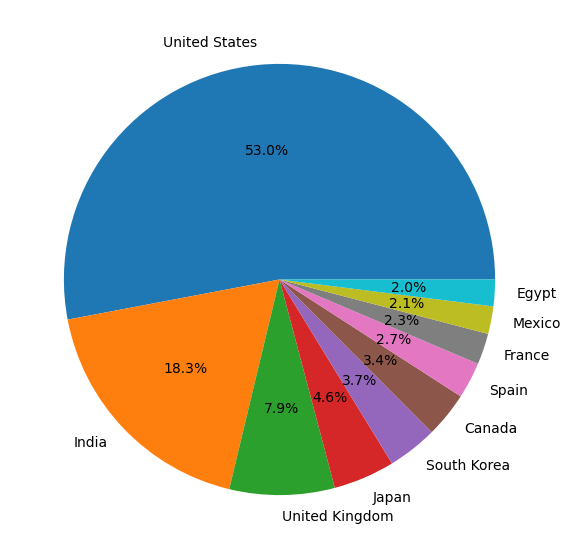

In [33]:
# Create a pie chart that displays the above result
import matplotlib.pyplot as plt
plt.figure(figsize = (7, 7))
plt.pie(df_sql['count'], labels=df_sql['country'], autopct='%1.1f%%')
plt.show()

The United States has the highest contributor with 53% of videos on Netflix. India surprisingly ranks second with 18.3%, followed by the United Kingdom with 7.9%.

In [34]:
sql='''
SELECT
    type,
    count(type) AS count
FROM netflix
GROUP BY type


''';

df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()

,type,count
0,Movie,6131
1,TV Show,2676


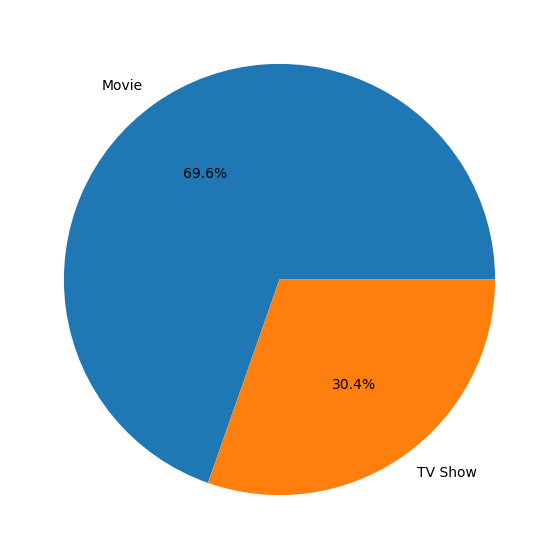

In [35]:
# Create a pie chart that displays the proportions of content that Netflix offers
plt.figure(figsize = (7, 7))
plt.pie(df_sql['count'], labels=df_sql['type'], autopct='%1.1f%%')
plt.show()

We can see that movies have a viewers rate of 69.6% which is much higher than that of TV shows which is 30.4%. It is clear that Netflix viewers explore more Movies than TV Shows overall.

In [37]:
# Obtain the nmber of tv shows & movies that are released during each year
# Here we use the FILTER clause to filter the rows of data that are of type Movie or TV Show group by release year. In fact, 
# FILTER clause is quite similar to WHERE clause when filtering rows, but localized to the specific aggregate function.
sql='''

SELECT
    release_year,
    count(*) FILTER (WHERE type = 'Movie') AS movie,
    count(*) FILTER (WHERE type = 'TV Show') AS tv
FROM netflix
GROUP BY release_year
ORDER BY release_year

''';

df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(10)

,release_year,movie,tv
0,1925,0,1
1,1942,2,0
2,1943,3,0
3,1944,3,0
4,1945,3,1
5,1946,1,1
6,1947,1,0
7,1954,2,0
8,1955,3,0
9,1956,2,0


<Axes: xlabel='release_year'>

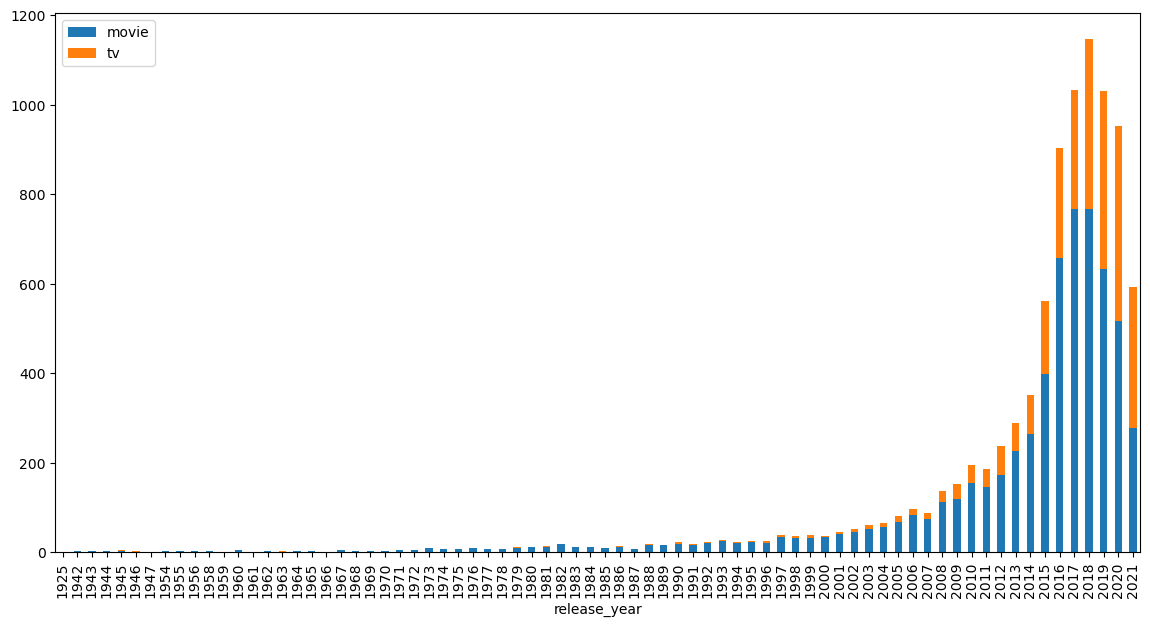

In [38]:
# Create a combination plot that represents the above result
df_sql.plot(kind='bar', x='release_year', stacked=True, figsize=(14, 7))

In [44]:
# Obtain the count for each of the genres
sql='''
SELECT
    genre,
    count(genre) AS count
    FROM netflix
WHERE type= 'Movie'
GROUP BY genre
ORDER BY count DESC
LIMIT 10
''';
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(10)

,genre,count
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252
5,Children & Family Movies,215
6,"Children & Family Movies, Comedies",201
7,"Documentaries, International Movies",186
8,"Dramas, International Movies, Romantic Movies",180
9,"Comedies, International Movies",176


<Axes: xlabel='count', ylabel='genre'>

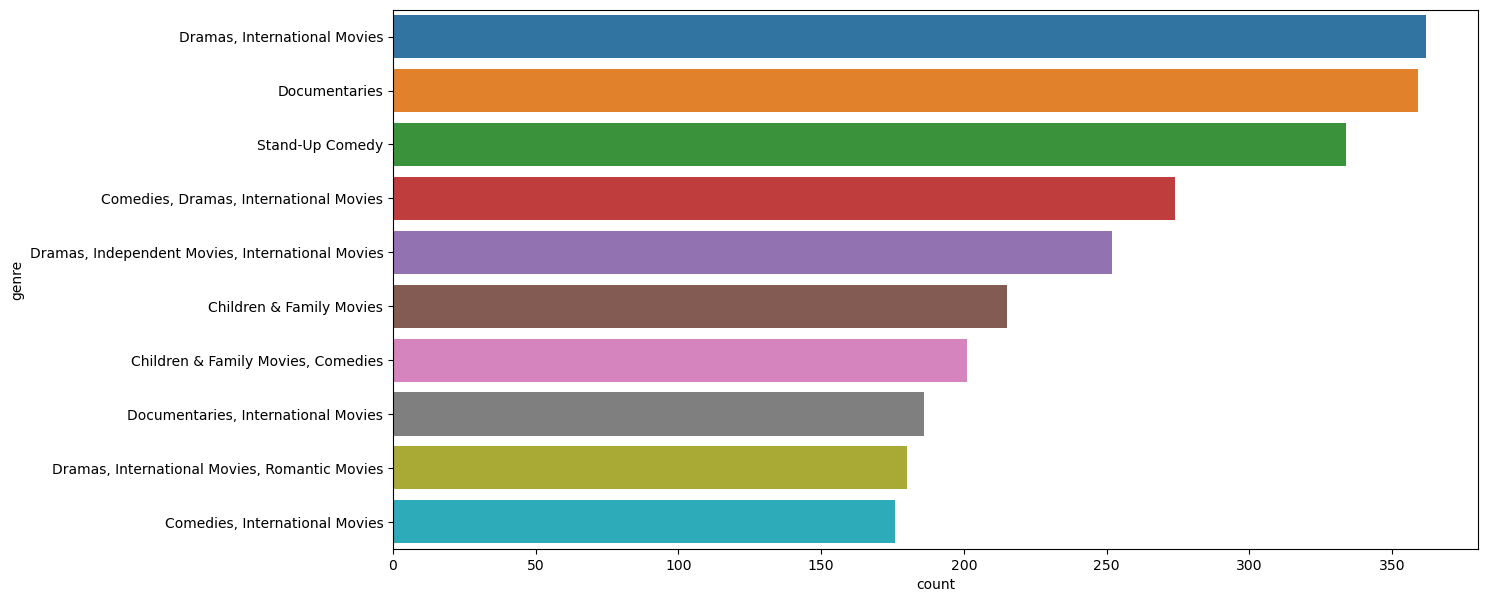

In [46]:
# Create a barplot displaying the 10 most popular genres
import seaborn as sns
plt.figure(figsize = (14, 7))

sns.barplot(data=df_sql, x="count", y='genre')

In [47]:
# Obtain the count for each genre of all the TV shows
sql='''
SELECT
    genre,
    count(*) AS count
FROM (
    SELECT
        title,
        genre
    FROM netflix
    WHERE type= 'TV Show'
)
GROUP BY genre
ORDER BY count DESC
LIMIT 10


''';

df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(10)



,genre,count
0,Kids' TV,220
1,"International TV Shows, TV Dramas",121
2,"Crime TV Shows, International TV Shows, TV Dramas",110
3,"Kids' TV, TV Comedies",99
4,Reality TV,95
5,"International TV Shows, Romantic TV Shows, TV ...",94
6,"International TV Shows, Romantic TV Shows, TV ...",90
7,"Anime Series, International TV Shows",88
8,Docuseries,85
9,TV Comedies,69


<Axes: xlabel='count', ylabel='genre'>

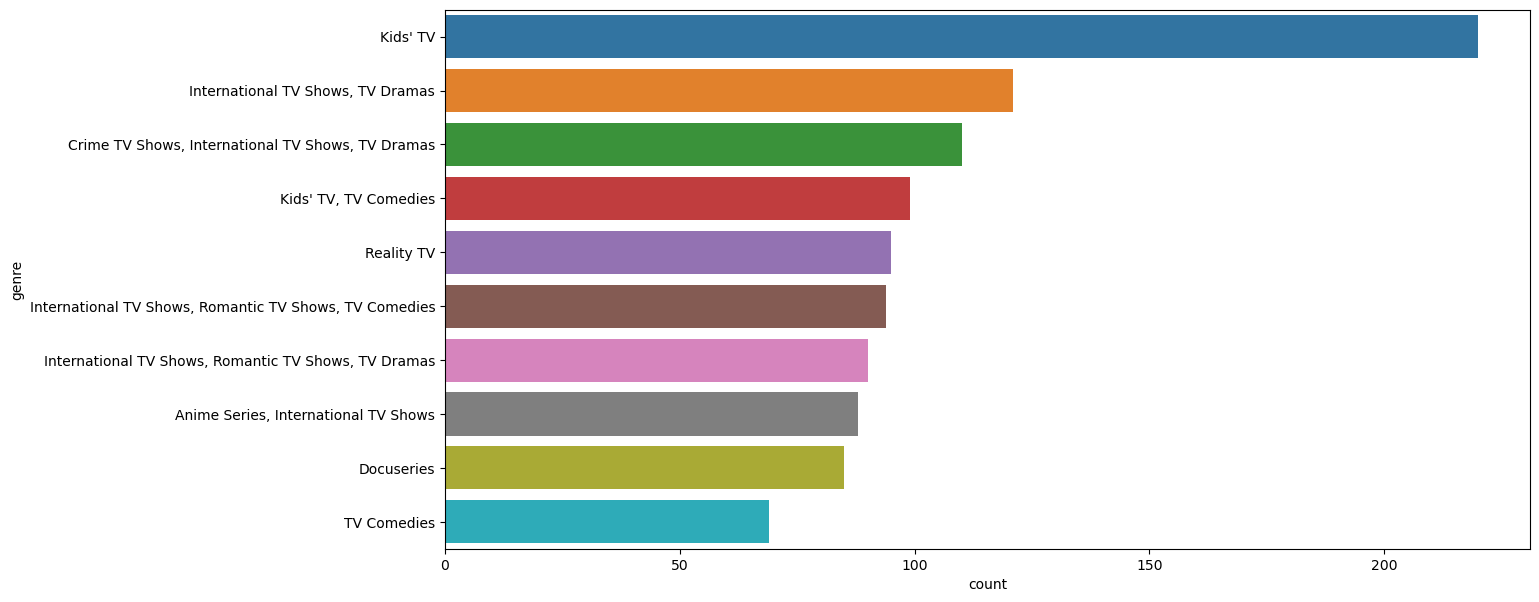

In [48]:
# Create a bar plot displaying the most popular tv show genres
plt.figure(figsize = (14, 7))

sns.barplot(data=df_sql, x="count", y='genre')

Kids' TV is the most popular tv show genre followed by International TV Shows, TV Dramas.

The film rating system is used in the United States to rate a motion picture’s suitability for certain audiences based on its content.

The MPA film ratings are as follows:

G — General Audiences

PG — Parental Guidance Suggested

PG-13 — Parents Strongly Cautioned

R — Restricted

NC-17 — Adults Only

NR — Not Rated

UR — Unrated

In [50]:
# Filter out the videos with film ratings
sql='''
SELECT
    rating,
    count(*) as count
FROM netflix
GROUP BY rating
HAVING rating IN ('G', 'PG', 'PG-13', 'R', 'NC-17', 'NR', 'UR')
ORDER BY count
DESC

''';

df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(10)

,rating,count
0,R,799
1,PG-13,490
2,PG,287
3,NR,80
4,G,41
5,UR,3
6,NC-17,3


Now we can visualize the data with categorical plots which involve a variable representing categories. This type of plots is commonly used when we want to make comparisons among different groups.

<Figure size 1400x700 with 0 Axes>

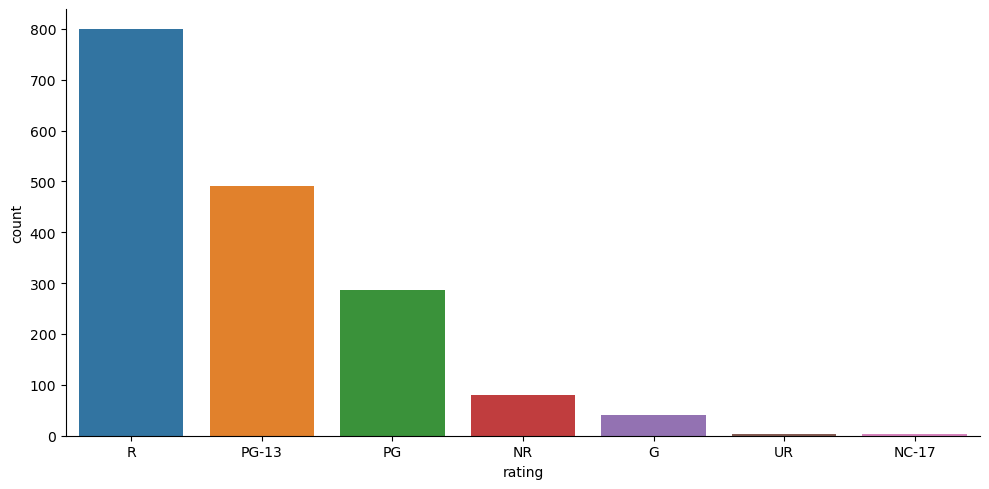

In [51]:
plt.figure(figsize = (14, 7))
sns.catplot(x='rating', y='count', data=df_sql, kind='bar', aspect=2)
plt.show()

We can conclude from the findings that Netflix majorly comprises videos rated R, PG-13, and PG.

Similarly, television content rating systems are systems for evaluating the content and reporting the suitability of television programs. Many countries have their own television rating system, here is the system used in the United States:

TV-Y — This program is aimed at a very young audience, including children from ages 2–6.

TV-Y7 — This program is designed for children aged 7 and above.

TV-G — Most parents would find this program suitable for all ages.

TV-PG — Parental guidance is recommended.

TV-14 — This program contains some material that many parents would find unsuitable for children under 14 years of age.

TV-MA — This program is intended to be viewed by adults and therefore may be unsuitable for children under 17.

In [53]:
# Let us leverage the IN clause to filter out all the videos with film ratings
sql='''
SELECT
    rating,
    count(*) as count
FROM netflix
GROUP BY rating
HAVING rating IN ('TV-Y7', 'TV-Y', 'TV-Y7', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA')
ORDER BY count
DESC
''';

df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(10)

,rating,count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,TV-Y7,334
4,TV-Y,307
5,TV-G,220


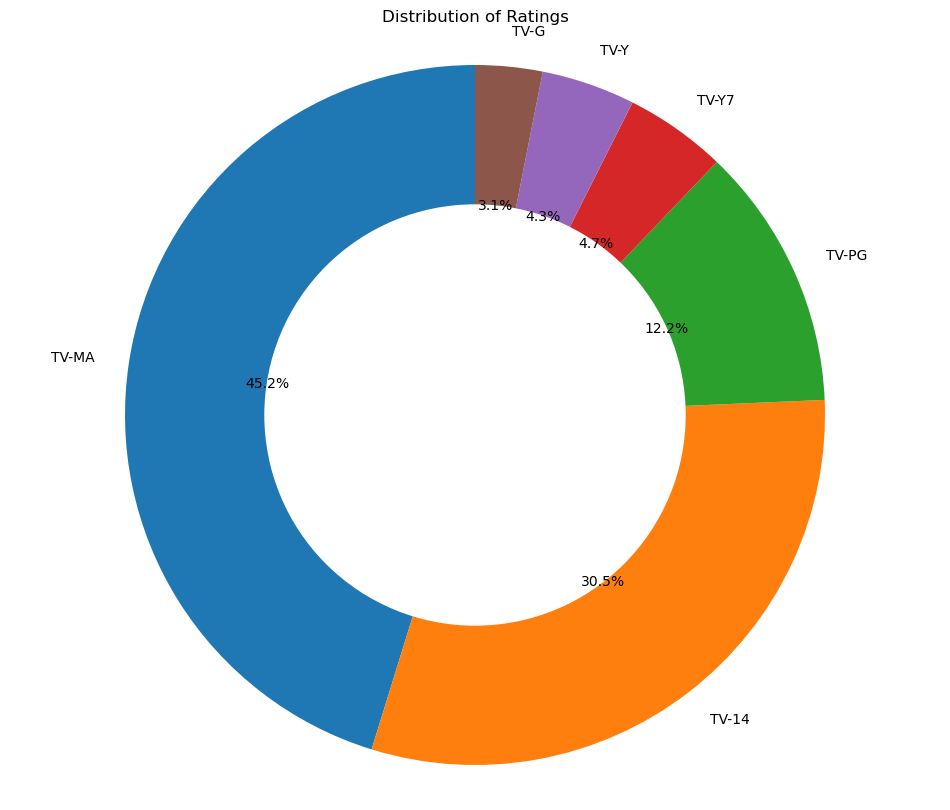

In [55]:
# Create a donut chart representing the above data
# Set the figure size
plt.figure(figsize=(12, 10))

# Create a pie chart
plt.pie(df_sql['count'], labels=df_sql['rating'], autopct='%1.1f%%', startangle=90)

# Add a circle at the center to create a donut chart
circle = plt.Circle((0, 0), 0.6, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

# Add a title
plt.title('Distribution of Ratings')

# Display the chart
plt.axis('equal')
plt.show()


We can conclude from the findings that Netflix majorly comprises videos rated TV-MA, TV-14, and TV-PG.